Importing the Dependencies

In [59]:
import kagglehub
import os

# downloading the latest version of the dataset from KAGGLE
dataset_path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

#using OS we get the path
path = os.path.join(dataset_path, "creditcard.csv")
#coverting to dataframe
credit_card_data = pd.read_csv(path)

In [60]:
#getting the rest of our dependencies out of the way
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [62]:
#last five
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [63]:
# dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [64]:
# checking the number of missing values in each column, null values
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


This Dataset is highly unblanced

Class
0    284315
1       492
Name: count, dtype: int64


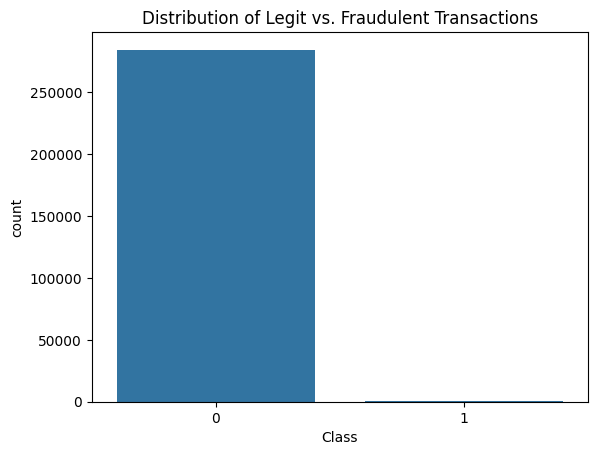

In [65]:
# distribution of legit transactions & fraudulent transactions
print(credit_card_data['Class'].value_counts())

#visualization
sns.countplot(x='Class', data=credit_card_data)
plt.title('Distribution of Legit vs. Fraudulent Transactions')
plt.show()

0 --> Normal Transaction

1 --> fraudulent transaction

In [66]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [67]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [68]:
# statistical measures of the data
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [69]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


               Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94838.202258  0.008258 -0.006271  0.012171 -0.007860  0.005453   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.002419  0.009637 -0.000987  0.004467  ... -0.000644 -0.001235   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.000024  0.000070  0.000182 -0.000072 -0.000089 -0.000295 -0.000131   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       88.291022  
1      122.211321  

[2 rows x 30

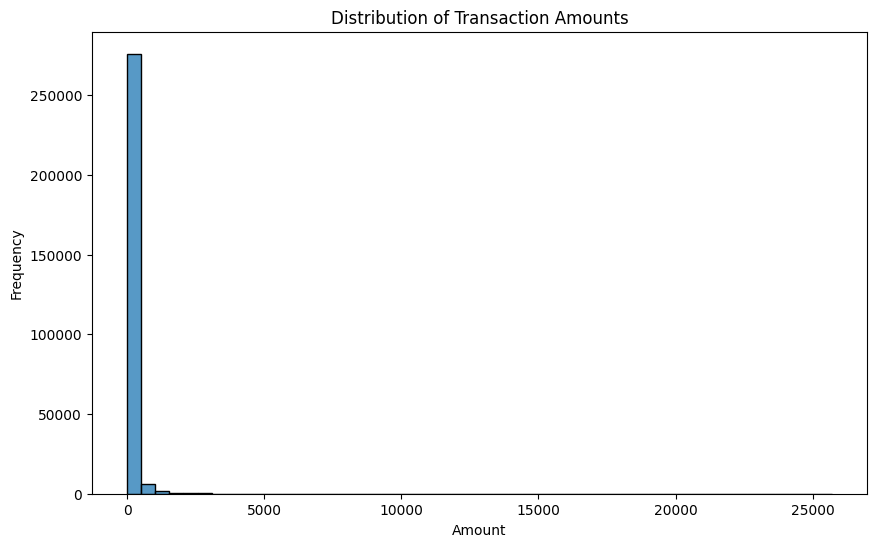

In [70]:
# compare the values for both transactions
print(credit_card_data.groupby('Class').mean())
#visualize the distribution of values
plt.figure(figsize=(10, 6))
sns.histplot(credit_card_data['Amount'], bins=50)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

Visualize the relationship between time and amount for fraudulent transactions:

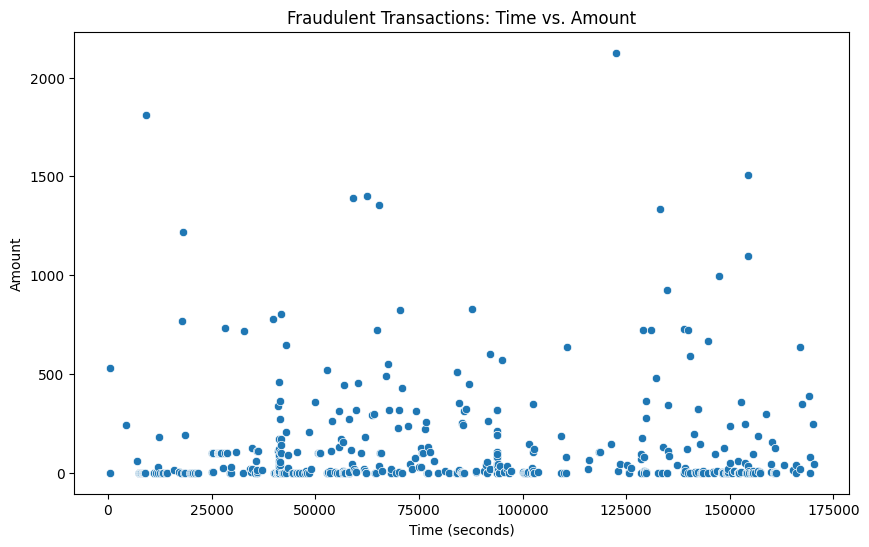

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Amount', data=credit_card_data[credit_card_data['Class'] == 1])
plt.title('Fraudulent Transactions: Time vs. Amount')
plt.xlabel('Time (seconds)')
plt.ylabel('Amount')
plt.show()

Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions.

Number of Fraudulent Transactions --> 492

In [72]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [73]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [74]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
117662,74758.0,-0.715864,0.847350,0.997855,-1.350123,-0.451154,-0.659230,-0.010972,0.608835,-0.150208,...,-0.048653,-0.299256,-0.019716,0.010853,-0.250714,0.731929,0.041289,-0.010719,0.77,0
25308,33550.0,1.052515,0.073225,0.534788,0.478126,0.196027,0.862605,-0.249600,0.357459,-0.036819,...,-0.113690,-0.165238,0.301852,-0.633938,-0.131192,0.202093,0.044773,0.008015,0.89,0
168509,119260.0,-0.747045,0.304032,-0.831995,-0.750680,2.689314,-1.064441,1.251871,-0.210571,-1.172706,...,0.404289,0.943426,-0.516531,0.177114,0.740913,0.682815,-0.028929,0.108097,0.00,0
268060,163040.0,1.933452,-0.670682,-0.866854,-0.189062,-0.048904,0.683691,-0.693463,0.176100,1.194627,...,0.198146,0.679398,-0.021792,-0.231621,-0.037330,0.126994,0.001353,-0.044696,59.95,0
225923,144449.0,-0.283602,0.669870,-0.498009,-0.769419,1.171719,-0.185507,1.164707,0.104006,-0.173868,...,0.027334,0.073588,-0.185417,0.058009,-0.153960,0.307458,0.309374,0.216434,33.35,0


In [75]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [76]:
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [77]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95440.522358,0.061375,0.016536,-0.001492,0.009201,-0.030944,0.022954,0.016095,-0.016844,0.007247,...,-0.045843,-0.016919,-0.033761,0.019454,0.06639,0.001973,0.009789,0.015013,0.012499,84.651402
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [78]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [79]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
117662   74758.0 -0.715864  0.847350  0.997855 -1.350123 -0.451154 -0.659230   
25308    33550.0  1.052515  0.073225  0.534788  0.478126  0.196027  0.862605   
168509  119260.0 -0.747045  0.304032 -0.831995 -0.750680  2.689314 -1.064441   
268060  163040.0  1.933452 -0.670682 -0.866854 -0.189062 -0.048904  0.683691   
225923  144449.0 -0.283602  0.669870 -0.498009 -0.769419  1.171719 -0.185507   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [80]:
print(Y)

117662    0
25308     0
168509    0
268060    0
225923    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into Training data & Testing Data

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [82]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Model Training

Logistic Regression

In [83]:
model = LogisticRegression()

In [84]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [85]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [86]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.951715374841169


In [87]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [88]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9441624365482234
